This Notebook can be used to visualize the scaling of acados solvers 

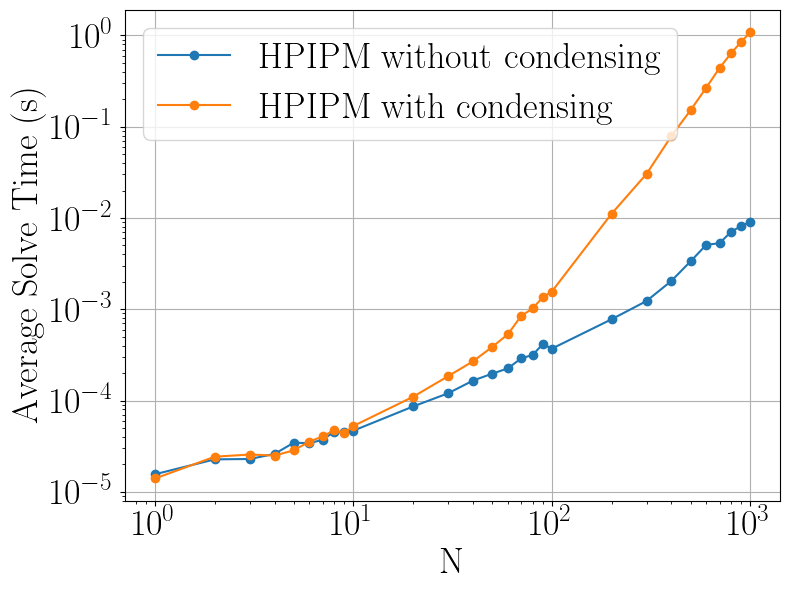

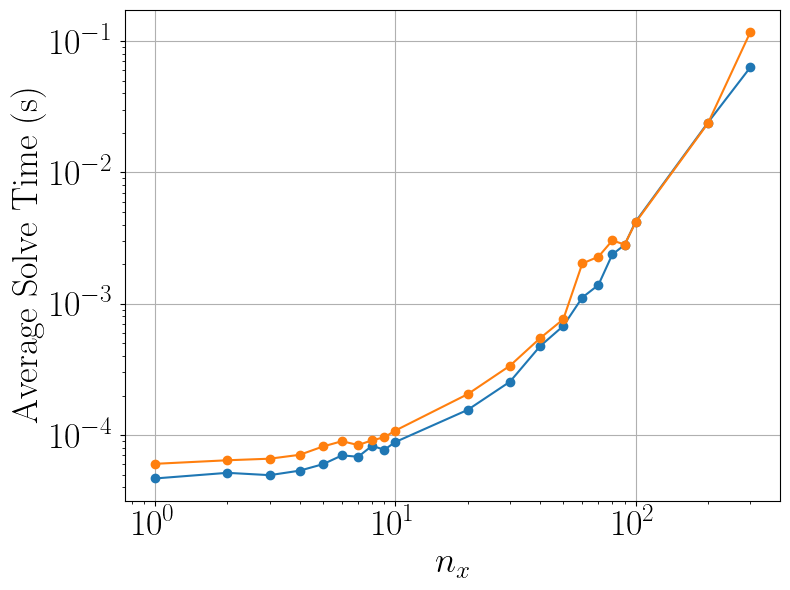

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from acados_template import latexify_plot
import os
import numpy as np
import ast
from utils_shared import get_dir

nx = 10
N = 20
latexify_plot(fontsize=26)

# Load and process scaling_N data
folder_dir = get_dir("data/acados_scaling")
csv_n = folder_dir / "sweep_results_scaling_N_new.csv"
df_n = pd.read_csv(csv_n)
df_n['time_tot'] = df_n['time_tot'].apply(ast.literal_eval)
df_n['time_tot_avg'] = df_n['time_tot'].apply(np.mean)
df_n['time_tot_std'] = df_n['time_tot'].apply(np.std)

qp_labels = {
    'PARTIAL_CONDENSING_HPIPM': "HPIPM without condensing",
    'FULL_CONDENSING_HPIPM': "HPIPM with condensing"
}

df_nx = df_n[df_n['nx'] == nx]
qp_solvers = df_nx['qp_solver'].unique()
plt.figure(figsize=(8, 6))
for qp in qp_solvers:
    df_qp = df_nx[df_nx['qp_solver'] == qp].sort_values('N')
    mean = df_qp['time_tot_avg']
    std = df_qp['time_tot_std']
    plt.plot(df_qp['N'], mean, marker='o', label=qp_labels[qp])
    #plt.fill_between(df_qp['N'], mean - std, mean + std, alpha=0.3)
plt.xlabel('N')
plt.ylabel('Average Solve Time (s)')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.grid(True)
plot_dir = get_dir("plots/acados_scaling")
plt.savefig(plot_dir / "scaling_N.pdf")
plt.show()

# Load and process scaling_nx data
folder_dir = get_dir("data/acados_scaling")
csv_nx = folder_dir / "sweep_results_scaling_nx_new.csv"
df_nx_file = pd.read_csv(csv_nx)
df_nx_file['time_tot'] = df_nx_file['time_tot'].apply(ast.literal_eval)
df_nx_file['time_tot_avg'] = df_nx_file['time_tot'].apply(np.mean)
df_nx_file['time_tot_std'] = df_nx_file['time_tot'].apply(np.std)

df_N = df_nx_file[df_nx_file['N'] == N]
qp_solvers = df_N['qp_solver'].unique()
plt.figure(figsize=(8, 6))
for qp in qp_solvers:
    df_qp = df_N[df_N['qp_solver'] == qp].sort_values('nx')
    mean = df_qp['time_tot_avg']
    std = df_qp['time_tot_std']
    plt.plot(df_qp['nx'], mean, marker='o', label=qp_labels[qp])
    #plt.fill_between(df_qp['nx'], mean - std, mean + std, alpha=0.3)
plt.xlabel(r'$n_x$')
plt.ylabel('Average Solve Time (s)')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.tight_layout()
plt.savefig(plot_dir / "scaling_nx.pdf")
plt.show()



